# MLP的劣势
>1. MLP必须用**全连接层**
2. MLP的的输入必须是向量（丢失了二维空间信息）
3. CNN的局部连接层--减少参数（**参数共享**）--保留空间信息

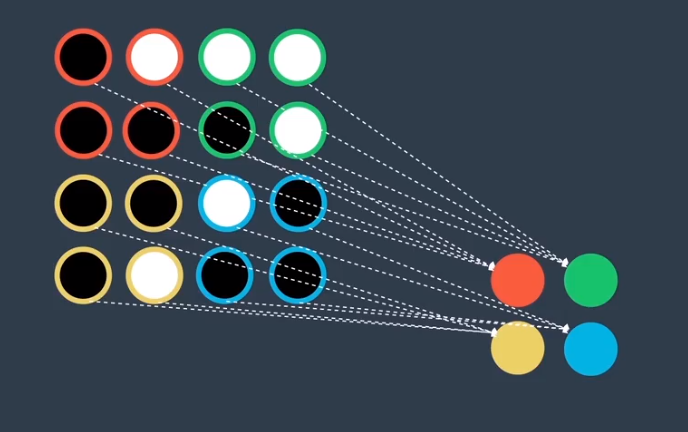

In [ ]:
# 卷积

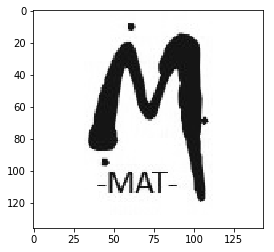

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: Feel free to try out your own images here by changing img_path
# to a file path to another image on your computer!
img_path = 'E:/Jupyter/mat_logo.jpg'

# load color image 
bgr_img = cv2.imread(img_path)
# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# normalize, rescale entries to lie in [0,1]
gray_img = gray_img.astype("float32")/255

# plot image
plt.imshow(gray_img, cmap='gray')
plt.show()

# 定义和可视化过滤器

In [2]:
import numpy as np

## TODO: Feel free to modify the numbers here, to try out another filter!
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

print('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


In [3]:
# 定义其他线性变化矩阵 

filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

# 输出样例 filter 1
print('Filter 1: \n', filter_1)

Filter 1: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


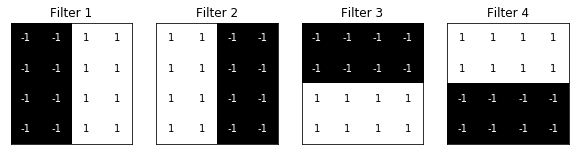

In [4]:
# 将四个过滤器可视化
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

# 定义卷积层
### [Conv2d](https://pytorch.org/docs/stable/nn.html#conv2d) (in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True)
### [Maxpooling2d](https://pytorch.org/docs/stable/nn.html#maxpool2d) (kernal_size, stride)
包含 init 和 forward
定义一个叫 Net 的网络

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
    
# 定义包含四个过滤器，但卷积层的网络
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # 初始化权重
        k_height, k_width = weight.shape[2:]
        # 保证有四个灰尺度的过滤器
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)

    def forward(self, x):
        # 计算卷积层的输出
        # 输入和激活
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        # returns both layers
        return conv_x, activated_x
    
# 实例化模型，设置权重
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# 输出模型
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


# 呈现每个过滤器的输出
首先，我们将定义一个辅助函数viz_layer，它接受一个特定的图层和多个过滤器（可选参数），并在图像通过后显示该图层的输出。

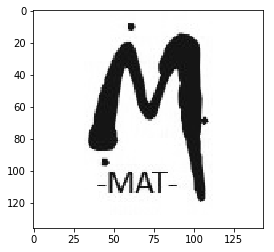

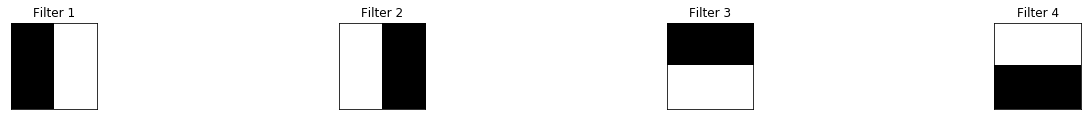

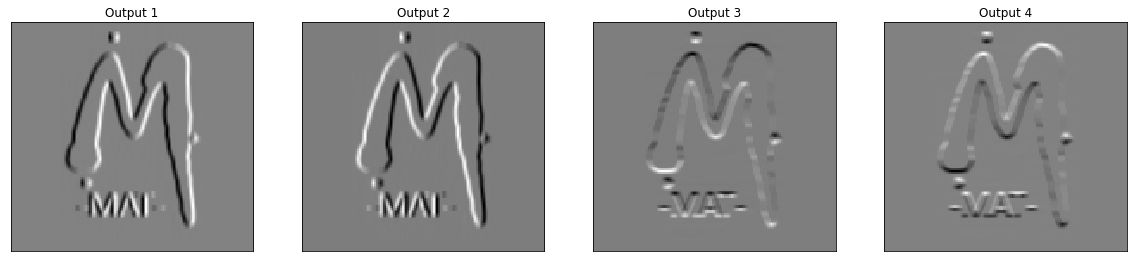

In [6]:
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))
        
# 原始图像
plt.imshow(gray_img, cmap='gray')

# 呈现所有滤波器
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# 将图像转化为张量输入
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# 获取卷积层
conv_layer, activated_layer = model(gray_img_tensor)

# 输出卷积层
viz_layer(conv_layer)

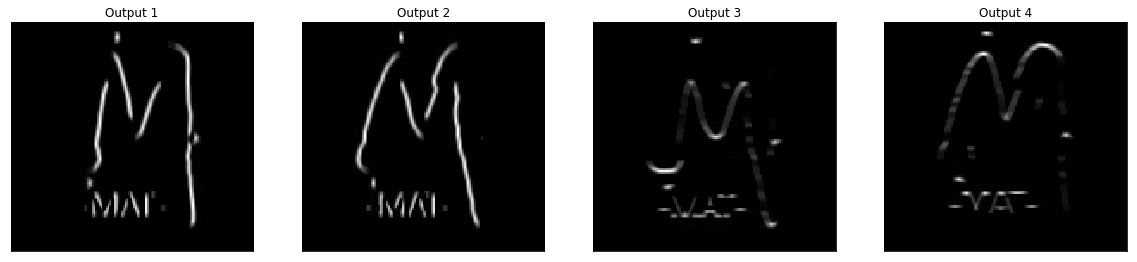

In [7]:
# 呈现激活函数后的图像
viz_layer(activated_layer)